
## Time Series data 

* traditional


In [15]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from statsmodels.datasets import co2, get_rdataset


In [16]:

## !pip install seaborn
## !pip install matplotlib
## !pip install hvplot
## !pip install PyViz
## !pip install statsmodels




## CIVS time series data


In [2]:

df_data = pd.read_csv('data/RealSeqData.CIVS.Nov.2023.csv')


/Users/user/opt/anaconda3/envs/py37_time_series/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,23,28,29,30,31,53,54,55,56) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:

df_data.head()


,time,THEORETICAL_TONNAGE,Coke_Rate,HOT_BLAST_TMP_NORTH_SOUTH,BF_WINDRATE,SNORT_VALVE_POSITION,i_COLD_BLAST_MOISTURE,HOST_BLAST_MOISTURE,HIGH_PURITY_OXYGEN,COAL_FLOW,...,BF14_material_8_weight_a,BF14_material_8_weight_b,BF14_material_9_weight_a,BF14_material_9_weight_b,BF14_material_10_weight_a,BF14_material_10_weight_b,NE_Uptake_Temp,SE_Uptake,NE_Uptake,SW_Uptake
0,8/1/21 0:00,6006,992,1999.604384,179.7496382,98.33429718,4.997584786,8.084516915,2.510679501,0,...,0,0,21118.33333,562140,9022.666667,212980,158.478922,245.6341754,145.3965382,220.7173486
1,8/1/21 0:01,6006,992,2000.288837,179.7659446,98.33429718,5.000530552,8.079545175,2.489380854,0,...,0,0,21115.00000,562140,8988.000000,212980,159.637733,252.4592171,145.5708951,226.3606003
2,8/1/21 0:02,6006,992,1999.242862,179.7822511,98.33429718,5.003476318,8.074573435,2.489036886,0,...,0,0,21111.66667,562140,8953.333333,212980,160.796544,252.6457359,145.745252,230.2975397
3,8/1/21 0:03,6006,992,1999.884442,179.7984904,98.33429718,5.006422084,8.069601695,2.49686719,0,...,0,0,21108.33333,562140,8918.666667,212980,161.955355,247.987563,145.9196089,225.2202915
4,8/1/21 0:04,6006,992,1999.849729,179.7844299,98.33429718,5.009367851,8.064629955,2.501961434,0,...,0,0,21105.00000,562140,8884.000000,212980,163.1027365,226.923719,146.0939658,218.8276934


In [5]:

ts_data = pd.read_csv(
            'data/RealSeqData.CIVS.Nov.2023.csv',
            header=0,
            parse_dates = ['time'],
            index_col=0,
            infer_datetime_format=True
)


/Users/user/opt/anaconda3/envs/py37_time_series/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,23,28,29,30,31,53,54,55,56) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:

ts_data.head(5)


,THEORETICAL_TONNAGE,Coke_Rate,HOT_BLAST_TMP_NORTH_SOUTH,BF_WINDRATE,SNORT_VALVE_POSITION,i_COLD_BLAST_MOISTURE,HOST_BLAST_MOISTURE,HIGH_PURITY_OXYGEN,COAL_FLOW,NAT_GAS_INJECTION,...,BF14_material_8_weight_a,BF14_material_8_weight_b,BF14_material_9_weight_a,BF14_material_9_weight_b,BF14_material_10_weight_a,BF14_material_10_weight_b,NE_Uptake_Temp,SE_Uptake,NE_Uptake,SW_Uptake
time,,,,,,,,,,,,,,,,,,,,,
2021-08-01 00:00:00,6006,992,1999.604384,179.7496382,98.33429718,4.997584786,8.084516915,2.510679501,0,4034.234339,...,0,0,21118.33333,562140,9022.666667,212980,158.478922,245.6341754,145.3965382,220.7173486
2021-08-01 00:01:00,6006,992,2000.288837,179.7659446,98.33429718,5.000530552,8.079545175,2.489380854,0,4024.947376,...,0,0,21115.00000,562140,8988.000000,212980,159.637733,252.4592171,145.5708951,226.3606003
2021-08-01 00:02:00,6006,992,1999.242862,179.7822511,98.33429718,5.003476318,8.074573435,2.489036886,0,4011.601682,...,0,0,21111.66667,562140,8953.333333,212980,160.796544,252.6457359,145.745252,230.2975397
2021-08-01 00:03:00,6006,992,1999.884442,179.7984904,98.33429718,5.006422084,8.069601695,2.49686719,0,4012.024633,...,0,0,21108.33333,562140,8918.666667,212980,161.955355,247.987563,145.9196089,225.2202915
2021-08-01 00:04:00,6006,992,1999.849729,179.7844299,98.33429718,5.009367851,8.064629955,2.501961434,0,4000.467204,...,0,0,21105.00000,562140,8884.000000,212980,163.1027365,226.923719,146.0939658,218.8276934


In [7]:

ts_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265020 entries, 2021-08-01 00:00:00 to 2022-01-31 23:59:00
Data columns (total 56 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   THEORETICAL_TONNAGE            265020 non-null  int64  
 1   Coke_Rate                      265020 non-null  int64  
 2   HOT_BLAST_TMP_NORTH_SOUTH      265020 non-null  object 
 3   BF_WINDRATE                    265020 non-null  object 
 4   SNORT_VALVE_POSITION           265020 non-null  object 
 5   i_COLD_BLAST_MOISTURE          265020 non-null  object 
 6   HOST_BLAST_MOISTURE            265020 non-null  object 
 7   HIGH_PURITY_OXYGEN             265020 non-null  object 
 8   COAL_FLOW                      265020 non-null  object 
 9   NAT_GAS_INJECTION              265020 non-null  object 
 10  i_HOT_BLAST_PRESSURE           265020 non-null  object 
 11  TOP_PRESS                      265020 non-null  object 
 

<AxesSubplot:xlabel='time'>

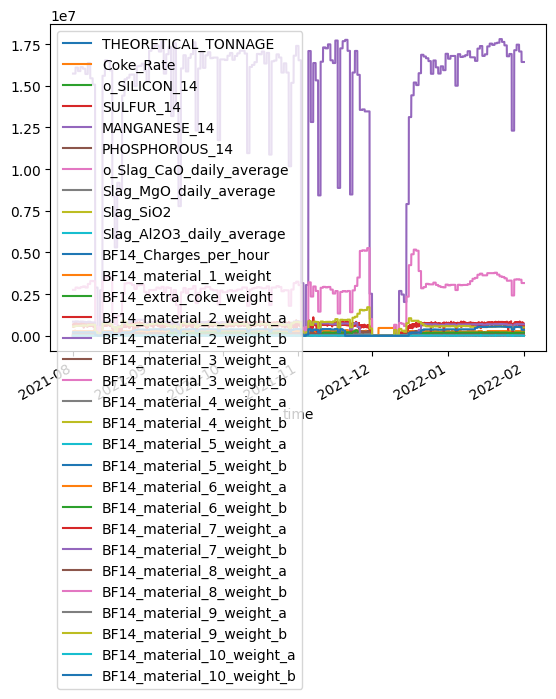

In [21]:

ts_data.plot()


array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabe

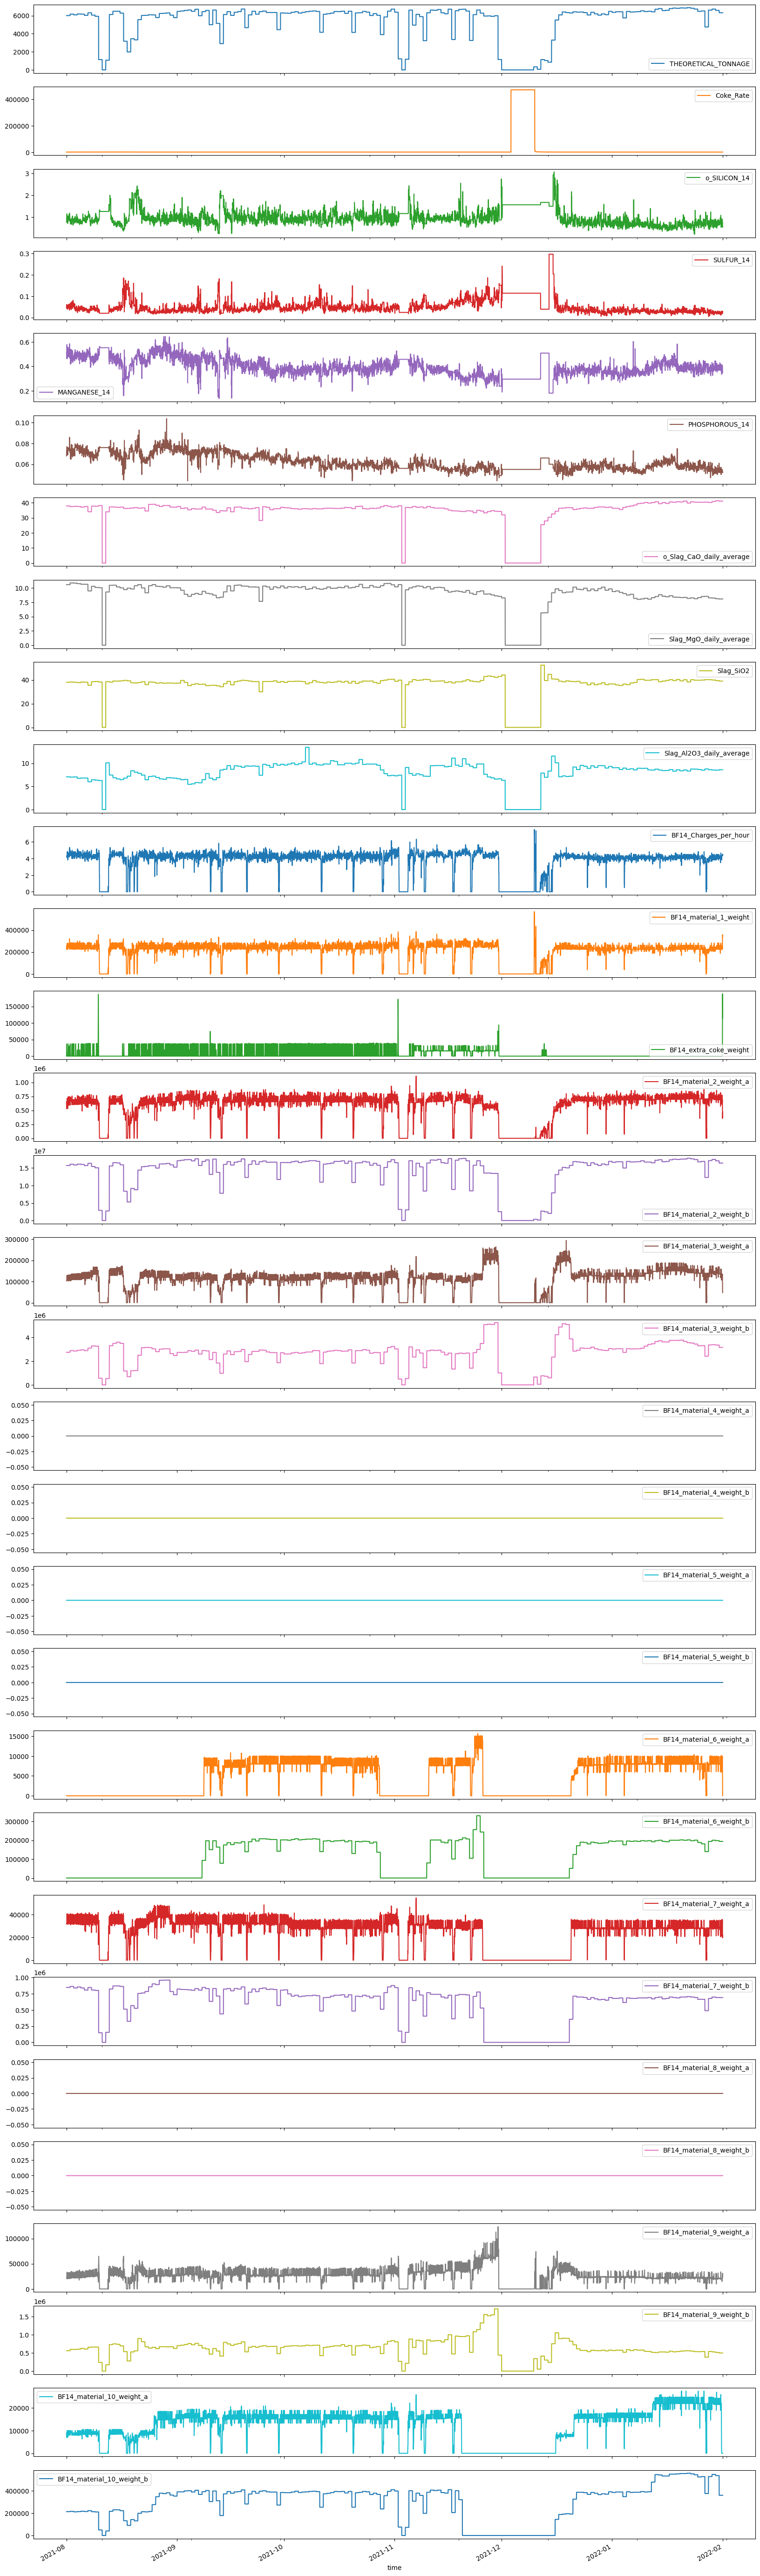

In [25]:

ts_data.plot( figsize=(20,80),  subplots=True   )



## CO2 book example


In [17]:

co2_df = co2.load_pandas().data
co2_df = co2_df.ffill()


<AxesSubplot:>

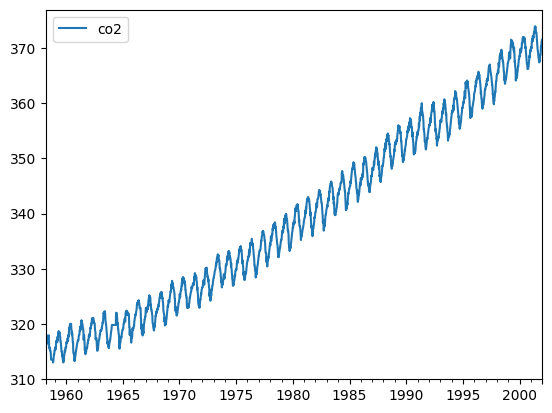

In [19]:

co2_df.plot()



## Air passengers example


In [18]:

air_passengers = get_rdataset("AirPassengers")
airp_df = air_passengers.data
airp_df.index = pd.date_range('1949', '1961', freq='M')
airp_df.drop(columns=['time'], inplace=True)


<AxesSubplot:>

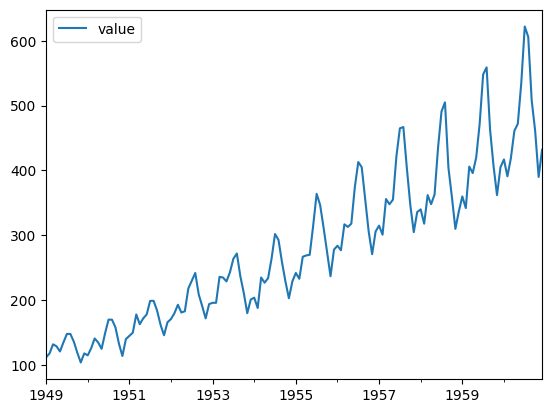

In [20]:

airp_df.plot()
